# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1506.
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           6.54e-46
Time:                        15:10:31   Log-Likelihood:                 11.338
No. Observations:                  50   AIC:                            -14.68
Df Residuals:                      46   BIC:                            -7.029
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8363      0.069     70.562      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.30022863  4.81770563  5.29195792  5.69283309  6.00106059  6.21141782
  6.33358814  6.39057     6.41489831  6.44329905  6.51065529  6.64427605
  6.85940944  7.15673746  7.52226398  7.92961423  8.3443681   8.72971529
  9.05250312  9.28868343  9.42726362  9.4721127   9.44132564  9.36425038
  9.2766661   9.21490476  9.20988186  9.28201716  9.4378797   9.6691086
  9.95378665 10.26004132 10.55128129 10.79220827 10.95461649 11.02202676
 10.99239395 10.87844308 10.70557852 10.50771023 10.32168238 10.18121999
 10.11138797 10.12447309 10.21796524 10.37496984 10.56698361 10.75857754
 10.91321779 10.9992681 ]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.98074423 10.81647038 10.52814345 10.165208    9.79275042  9.47556358
  9.26228323  9.17348028  9.19662434  9.28915159]


## Plot comparison

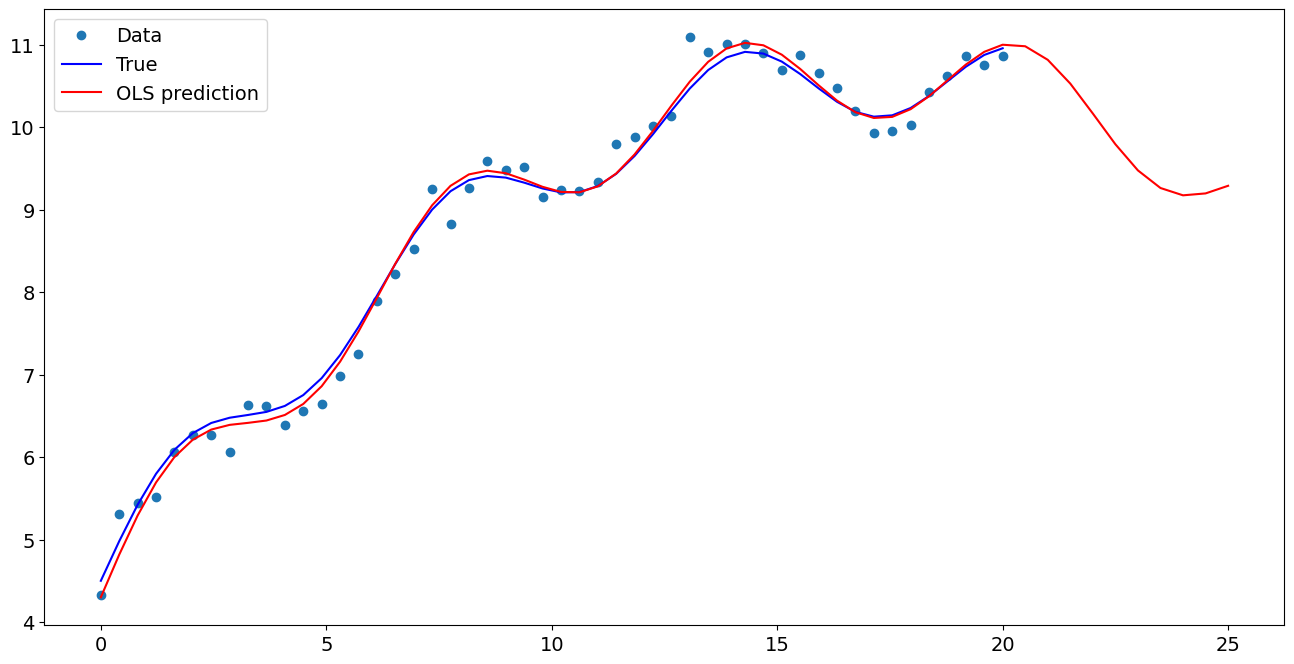

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.836284
x1                  0.524119
np.sin(x1)          0.553264
I((x1 - 5) ** 2)   -0.021442
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.980744
1    10.816470
2    10.528143
3    10.165208
4     9.792750
5     9.475564
6     9.262283
7     9.173480
8     9.196624
9     9.289152
dtype: float64